In [ ]:
###### Importación librerías ######
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

# 1. Carga y exploración de datos

Gráfico de conexiones
![grafo_conexiones]()

In [3]:
# Cargar datos del grafo
conexiones = np.load("conexiones.npy")
print(conexiones)

estaciones = np.load("estaciones.npy", allow_pickle=True)
print(estaciones)

[('E1', 'E2') ('E1', 'E3') ('E1', 'E4') ('E1', 'E12') ('E1', 'E13')
 ('E1', 'E14') ('E2', 'E5') ('E2', 'E6') ('E2', 'E7') ('E3', 'E7')
 ('E3', 'E8') ('E3', 'E5') ('E4', 'E9') ('E4', 'E10') ('E4', 'E6')
 ('E5', 'E8') ('E5', 'E11') ('E6', 'E9') ('E6', 'E11') ('E7', 'E10')
 ('E7', 'E11') ('E8', 'E10') ('E9', 'E11') ('E12', 'E15') ('E12', 'E16')
 ('E12', 'E17') ('E13', 'E17') ('E13', 'E18') ('E13', 'E15')
 ('E14', 'E19') ('E14', 'E20') ('E14', 'E16') ('E15', 'E18')
 ('E15', 'E21') ('E16', 'E19') ('E16', 'E22') ('E17', 'E20')
 ('E17', 'E21') ('E18', 'E22') ('E19', 'E22') ('E20', 'E21') ('E8', 'E23')
 ('E10', 'E23') ('E11', 'E23') ('E20', 'E23') ('E21', 'E23')
 ('E22', 'E23')]
[('E1', list(['temperatura', 'sanitaria']),  0. )
 ('E2', list(['temperatura']), 12.4) ('E3', list(['temperatura']),  9.8)
 ('E4', list(['temperatura']), 14.2) ('E5', list(['temperatura']), 10.5)
 ('E6', list(['temperatura']),  8.9) ('E7', list(['temperatura']), 13.1)
 ('E8', list(['temperatura']), 11.7) ('E9', list(['

In [4]:
nodes = ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11',
         'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23']

# Crear matriz 23x23 llena de ceros
adj_matrix = [[0]*23 for _ in range(23)]

edges = [
    ('E1', 'E2'), ('E1', 'E3'), ('E1', 'E4'), ('E1', 'E12'), ('E1', 'E13'),
    ('E1', 'E14'), ('E2', 'E5'), ('E2', 'E6'), ('E2', 'E7'), ('E3', 'E7'),
    ('E3', 'E8'), ('E3', 'E5'), ('E4', 'E9'), ('E4', 'E10'), ('E4', 'E6'),
    ('E5', 'E8'), ('E5', 'E11'), ('E6', 'E9'), ('E6', 'E11'), ('E7', 'E10'),
    ('E7', 'E11'), ('E8', 'E10'), ('E9', 'E11'), ('E12', 'E15'), ('E12', 'E16'),
    ('E12', 'E17'), ('E13', 'E17'), ('E13', 'E18'), ('E13', 'E15'),
    ('E14', 'E19'), ('E14', 'E20'), ('E14', 'E16'), ('E15', 'E18'),
    ('E15', 'E21'), ('E16', 'E19'), ('E16', 'E22'), ('E17', 'E20'),
    ('E17', 'E21'), ('E18', 'E22'), ('E19', 'E22'), ('E20', 'E21'),
    ('E8', 'E23'), ('E10', 'E23'), ('E11', 'E23'), ('E20', 'E23'),
    ('E21', 'E23'), ('E22', 'E23')
]

# Llenar la matriz con costo=1 (puedes cambiarlo si quieres)
for (a, b) in edges:
    i = nodes.index(a)
    j = nodes.index(b)
    adj_matrix[i][j] = 1
    adj_matrix[j][i] = 1  # Grafo no dirigido

# Imprimir la matriz para GraphOnline (fila por fila)
for row in adj_matrix:
    print(' '.join(map(str,row)))


0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0
0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0
0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0
0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0
0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 

# 2. Formulación formal del problema

Un par de productos se deben mover desde un punto a otro gastando la menor cantidad de recursos. Para lograrlo el producto debe atravesar diferentes estaciones. Cada estación tiene un costo asociado al traslado, y una restricción que indica si recibe uno u otro producto. 

Se debe hallar un cámino que cumpla lo siguiente:

**MIN f(producto, nodo_origen, nodo_destino) = sum(costo(nodo_origen, nodo_next))** , suma desde nodo_origen hasta nodo_destino donde el valor a sumar corresponde al valor del enlace.

s.a
1. nodo_origen = E1
2. nodo_destino = E23
3. producto medico debe pasar solo por estaciones de temperatura
4. producto alimenticio debe pasar solo por estaciones de sanidad

# 3. Implementación de los tres algoritmos 

## DFS Algorithm

Algoritmo de búsqueda no informado. Se implementará con lógica de búsqueda In Order. Este algoritmo podría ser bueno para este problema dado que es pequeño (menos de 50 nodos)

In [5]:
# Implementación DFS
# conexiones
# estaciones

# Estructura Nodo
class Nodo():
    def __init__(self, estacion:str, certificado:list, costo:float):
        self.estacion = estacion
        self.certificado = certificado
        self.costo = costo
        self.vecinos = [str(nodo[1]) for nodo in conexiones if nodo[0] == self.estacion]

def generar_nodo(estacion):
    info = [info_estacion for info_estacion in estaciones if info_estacion[0] == estacion][0]
    return Nodo(
        estacion=estacion,
        certificado=info[1],
        costo=info[2]
    )


def DFS(certificado:str, nodo_origen:str, nodo_destino:str, acc:float=0, path=None):
    '''
    Algoritmo Deep First Search implementado con lógica in order, es decir,
    itera tomando el primer hijo de cada nodo según el orden en el que se 
    hayan insertado en el árbol/grafo. Retorna el primer camino que encuentra.

    Parámetros:
    certificado (str): "sanitaria" o "temperatura"puedes armar una solucion interactiva como la del dfs pero especificamente para el ucs osea que muestre tambien la frotnera etc.
    nodo_origen (str): nombre de la estación, ej: "E1"
    nodo_destino (str): nombre de la estación, ej: "E23"
    acc (float): costo acumulado del path
    path (list<str>): lista con los nombres de las estaciones 

    Retorna:
    (path, acc) (tuple): Si encuentra un cámino desde nodo_origen a nodo_destino
    None: Si no encuentra un cámino desde nodo_origen a nodo_destino 

    '''

    # Validaciones #
    if certificado not in ["sanitaria", "temperatura"]:
        print("Error: tipo de certificado no válido")
        return None
    
    if not nodo_origen:
        print("Nodo inválido o Ruta no encontrada")
        return None

    # Inicialización #
    if path is None:
        path = []

    nodo = generar_nodo(nodo_origen)

    # Condición base #    
    if nodo.estacion == nodo_destino:
        path.append(nodo.estacion)
        acc+=nodo.costo
        return path, acc
    

    # Recursividad #
    if certificado in nodo.certificado and nodo.estacion not in path:
        path.append(nodo.estacion)
        acc+=nodo.costo
        for vecino in nodo.vecinos:
            resultado = DFS(certificado, vecino, nodo_destino, acc, path.copy())
            if resultado:
                return resultado
    
    return None

# Aplicación del algoritmo
dfs_path_sanitaria = DFS("sanitaria", "E1", "E23")
dfs_path_temperatura = DFS("temperatura", "E1", "E23")
print(dfs_path_sanitaria)
print(dfs_path_temperatura)
    

# Validación
def validate_path(path:list, cost:float):
    acc = 0
    for i in range(len(path)-1):
        nodo_actual = generar_nodo(path[i])
        vecinos = nodo_actual.vecinos
        acc+= nodo_actual.costo
        if path[i+1] not in vecinos:
            print(f"Error: no es posible llegar de {path[i]} a {path[i+1]}")
            return False
    acc+= generar_nodo(path[i+1]).costo
    return True and acc == cost

print(f"El path es {validate_path(dfs_path_sanitaria[0], dfs_path_sanitaria[1])}")
print(f"El path es {validate_path(dfs_path_temperatura[0], dfs_path_temperatura[1])}")



(['E1', 'E12', 'E15', 'E18', 'E22', 'E23'], 38.29999923706055)
(['E1', 'E2', 'E5', 'E8', 'E10', 'E23'], 49.39999961853027)
El path es True
El path es True


# BFS

Algoritmo Breadth-First Search (BFS) explora los nodos vecinos nivel por nivel, encontrando el camino más corto en número de aristas. Es útil para encontrar soluciones rápidas en grafos no ponderados o cuando se busca la menor cantidad de pasos.

In [29]:
# Implementación BFS
class Nodo():
    def __init__(self, estacion:str, certificado:list, costo:float):
        self.estacion = estacion
        self.certificado = certificado
        self.costo = costo
        self.vecinos = [str(nodo[1]) for nodo in conexiones if nodo[0] == self.estacion]

def generar_nodo(estacion):
    info = [info_estacion for info_estacion in estaciones if info_estacion[0] == estacion]
    if not info:
        raise ValueError(f"Station '{estacion}' not found in 'estaciones' data.")
    info = info[0]
    return Nodo(
        estacion=estacion,
        certificado=info[1],
        costo=info[2]
    )

def BFS(certificado_req:str, id_origen:str, id_destino:str):
    '''
    Algoritmo Breadth-First Search implementado con una cola (lista de Python).
    Encuentra el camino más corto en términos de número de aristas.
    '''
    if certificado_req not in ["sanitaria", "temperatura"]:
        print("Error: tipo de certificado no válido")
        return None
    cola = []
    visitados = set()
    nodo_inicial_obj = generar_nodo(id_origen)
    es_estacion_especial = (nodo_inicial_obj.estacion == 'E1' or nodo_inicial_obj.estacion == 'E23')
    if not (es_estacion_especial or certificado_req in nodo_inicial_obj.certificado):
        print(f"Error: Nodo origen '{id_origen}' no cumple con el certificado '{certificado_req}'.")
        return None
    cola.append((nodo_inicial_obj.estacion, [nodo_inicial_obj.estacion], nodo_inicial_obj.costo))
    visitados.add(nodo_inicial_obj.estacion)
    while cola:
        nombre_estacion_actual, camino_actual, costo_actual = cola.pop(0)
        if nombre_estacion_actual == id_destino:
            return camino_actual, costo_actual
        nodo_actual_obj = generar_nodo(nombre_estacion_actual)
        for nombre_vecino in nodo_actual_obj.vecinos:
            if nombre_vecino not in visitados:
                nodo_vecino_obj = generar_nodo(nombre_vecino)
                es_vecino_especial = (nodo_vecino_obj.estacion == 'E1' or nodo_vecino_obj.estacion == 'E23')
                if es_vecino_especial or certificado_req in nodo_vecino_obj.certificado:
                    visitados.add(nombre_vecino)
                    nuevo_camino = camino_actual + [nombre_vecino]
                    nuevo_costo = costo_actual + nodo_vecino_obj.costo
                    cola.append((nombre_vecino, nuevo_camino, nuevo_costo))
    return None

# Aplicación del algoritmo
bfs_path_sanitaria = BFS("sanitaria", "E1", "E23")
bfs_path_temperatura = BFS("temperatura", "E1", "E23")
print("BFS Sanitaria:", bfs_path_sanitaria)
print("BFS Temperatura:", bfs_path_temperatura)

def validate_path(camino:list, costo:float):
    if camino is None:
        return False
    costo_calculado = 0.0
    for nombre_estacion_en_camino in camino:
        info_estacion = [info_estacion for info_estacion in estaciones if info_estacion[0] == nombre_estacion_en_camino][0]
        costo_calculado += info_estacion[2]
    return (costo_calculado == costo)

print(f"BFS Path Sanitaria is valid: {validate_path(bfs_path_sanitaria[0], bfs_path_sanitaria[1])}")
print(f"BFS Path Temperatura is valid: {validate_path(bfs_path_temperatura[0], bfs_path_temperatura[1])}")

BFS Sanitaria: (['E1', 'E14', 'E20', 'E23'], 19.0)
BFS Temperatura: (['E1', 'E3', 'E8', 'E23'], 21.5)
BFS Path Sanitaria is valid: True
BFS Path Temperatura is valid: True


In [ ]:
def solucion_interactiva_bfs(path, tipo_certificado):
    if tipo_certificado not in ["s", "t"]:
        print("Error: ingresa certificado en formato 's' sanitaria o 't' temperatura")
        return None
    acc = 0
    for i in range(len(path)-1):
        nodo_actual = generar_nodo(path[i])
        certificados_actual = ', '.join([c[0] if isinstance(c, (list, tuple)) else str(c) for c in nodo_actual.certificado])
        vecinos = nodo_actual.vecinos
        acc += nodo_actual.costo
        print("=============================")
        print(f"\033[94m Iteración: {i} \033[0m")
        print(f"\033[92mEstación: ({nodo_actual.estacion}, ({certificados_actual}), {nodo_actual.costo:.2f})\033[0m")
        print(f"\033[96mPath: {path[0:i+1]} - Costo Acc: {acc:.2f}")
        print("\033[95mHijos: ", end="")
        for estacion in vecinos:
            estacion_info = [est for est in estaciones if est[0] == estacion][0]
            certificados = ', '.join([c[0] if isinstance(c, (list, tuple)) else str(c) for c in estacion_info[1]])
            print(f"({estacion_info[0]}, ({certificados}), {estacion_info[2]:.2f}) ", end="")
        print("\033[0m")
    # Último nodo
    nodo_final = generar_nodo(path[-1])
    acc += nodo_final.costo
    print(f"\033[92mEstación final: ({nodo_final.estacion}, {nodo_final.costo:.2f})\033[0m")
    print(f"\033[96mPath completo: {path} - Costo Total: {acc:.2f}\033[0m")

print("_______________________________ Solución BFS para producto Sanitario _______________________________")
if bfs_path_sanitaria:
    solucion_interactiva_bfs(bfs_path_sanitaria[0], "s")
print("_______________________________ Solución BFS para producto Temperatura _______________________________")
if bfs_path_temperatura:
    solucion_interactiva_bfs(bfs_path_temperatura[0], "t")

# UCS

Funciona priorizando las rutas con el menor costo total desde el punto de partida.

**Complejidad Temporal:**
En el peor caso, con $b$ = máxima cantidad de hijos por nodo, $C^*$ = costo de la solución óptima y $e$ = costo mínimo de una arista, tenemos:

$$
O\left(b^{1 + \frac{C^*}{e}}\right)
$$

En el mejor caso la complejidad temporal sería $O(1)$ si el nodo inicial es la solución.

**Complejidad Espacial:**
La complejidad espacial es exactamente la misma que la temporal, ya que en el peor caso tendremos que almacenar todos los nodos y en el mejor, solo uno.

**Optimalidad y Completitud**

Siempre que tengamos un set de explorados para no entrar en ciclos infinitos y ademas los nodos tengan costo > 0 para no irse por ramas infinitas que no lleguen a la solucion. El algoritmo sera completo es decir llegará a una solucion. Puesto que UCS expande con prioridad por los caminos mas baratos, la solucion siempre sera optima.


In [30]:
# conexiones
# estaciones


def UCS(certificado:str, nodo_origen:str, nodo_destino:str):
    '''
    Algoritmo Uniform Cost Search usa una frontera ordenada por costo acumulado.

    Parámetros:
    certificado (str): "sanitaria" o "temperatura".
    nodo_origen (str): nombre de la estación, ej: "E1"
    nodo_destino (str): nombre de la estación, ej: "E23"

    Retorna:
    (path, acc) (tuple): Si encuentra un camino desde nodo_origen a nodo_destino
    None: Si no encuentra un camino desde nodo_origen a nodo_destino
    '''

    if certificado not in ["sanitaria", "temperatura"]:
        print("Error: tipo de certificado no válido")
        return None

    if not nodo_origen:
        print("Nodo inválido o Ruta no encontrada")
        return None

    # Inicialización
    # frontera: lista de tuplas (costo_acumulado, path)
    frontera = [(0.0, [nodo_origen])]
    explorados = set()
    mejor_costo = {}  # mejor costo conocido para cada estación

    while frontera:
        # Ordenar frontera por costo acumulado
        frontera.sort(key=lambda x: x[0])
        costo_actual, path_actual = frontera.pop(0)

        estacion_actual = path_actual[-1]

        if estacion_actual in explorados:
            continue

        # Condicion Base
        if estacion_actual == nodo_destino:
            return path_actual, costo_actual

        explorados.add(estacion_actual)

        nodo_actual = generar_nodo(estacion_actual)

        if certificado in nodo_actual.certificado:
            for vecino in nodo_actual.vecinos:
                if vecino not in explorados:
                    nodo_vecino = generar_nodo(vecino)

                    if certificado in nodo_vecino.certificado:
                        nuevo_costo = costo_actual + nodo_vecino.costo
                        nuevo_path = path_actual + [vecino]

                        # Verificar si es mejor que el costo conocido
                        if vecino not in mejor_costo or nuevo_costo < mejor_costo[vecino]:
                            mejor_costo[vecino] = nuevo_costo
                            frontera.append((nuevo_costo, nuevo_path))

    return None

# Aplicación del algoritmo
ucs_path_sanitaria = UCS("sanitaria", "E1", "E23")
ucs_path_temperatura = UCS("temperatura", "E1", "E23")
print("UCS Sanitaria:", ucs_path_sanitaria)
print("UCS Temperatura:", ucs_path_temperatura)

# Validación
print(f"UCS Sanitaria - El path es válido: {validate_path(ucs_path_sanitaria[0], ucs_path_sanitaria[1])}")
print(f"UCS Temperatura - El path es válido: {validate_path(ucs_path_temperatura[0], ucs_path_temperatura[1])}")

UCS Sanitaria: (['E1', 'E14', 'E20', 'E23'], 19.0)
UCS Temperatura: (['E1', 'E3', 'E8', 'E23'], 21.5)
UCS Sanitaria - El path es válido: True
UCS Temperatura - El path es válido: True


# 4. Función de visualización de la solución

## DFS

In [7]:
def solucion_interactiva(path:list, tipo_certificado:str):
    if tipo_certificado not in ["s", "t"]:
        print("Error: ingresa certificado en formato 's' sanitaria o 't' temperatura")
        return None
    acc = 0
    for i in range(len(path)-1):
        nodo_actual = generar_nodo(path[i])
        certificados_actual = ', '.join([c[0] for c in nodo_actual.certificado])
        vecinos = nodo_actual.vecinos
        acc+= nodo_actual.costo
        found_next_node = 0
        print("=============================")
        print(f"\033[94m Iteración: {i} \033[0m")
        print(f"\033[92mEstación: ({nodo_actual.estacion}, ({certificados_actual}), {nodo_actual.costo:.2f})\033[0m")
        print(f"\033[96mPath: {path[0:i+1]} - Costo Acc: {acc:.2f}")
        print("\033[95mHijos: ", end="")
        for estacion in vecinos:
            estacion_info = [est for est in estaciones if est[0] == estacion][0]
            certificados = ', '.join([c[0] for c in estacion_info[1]])
            if tipo_certificado in certificados:
                found_next_node+=1
            if found_next_node == 1:
                print(f"\033[93m({estacion_info[0]}, ({certificados}), {estacion_info[2]:.2f}) ", end="")
            else:
                print(f"\033[95m({estacion_info[0]}, ({certificados}), {estacion_info[2]:.2f}) ", end="")
        print("\033[0m")

print("_______________________________ Solución para producto Sanitario _______________________________")
solucion_interactiva(dfs_path_sanitaria[0], "s")
print("_______________________________ Solución para producto Temperatura _______________________________")
solucion_interactiva(dfs_path_temperatura[0], "t")

_______________________________ Solución para producto Sanitario _______________________________
 Iteración: 0 
Estación: (E1, (t, s), 0.00)
Path: ['E1'] - Costo Acc: 0.00
Hijos: (E2, (t), 12.40) (E3, (t), 9.80) (E4, (t), 14.20) (E12, (s), 8.70) (E13, (s), 11.30) (E14, (s), 9.10) 
 Iteración: 1 
Estación: (E12, (s), 8.70)
Path: ['E1', 'E12'] - Costo Acc: 8.70
Hijos: (E15, (s), 7.50) (E16, (s), 10.80) (E17, (s), 6.90) 
 Iteración: 2 
Estación: (E15, (s), 7.50)
Path: ['E1', 'E12', 'E15'] - Costo Acc: 16.20
Hijos: (E18, (s), 11.70) (E21, (s), 7.20) 
 Iteración: 3 
Estación: (E18, (s), 11.70)
Path: ['E1', 'E12', 'E15', 'E18'] - Costo Acc: 27.90
Hijos: (E22, (s), 10.40) 
 Iteración: 4 
Estación: (E22, (s), 10.40)
Path: ['E1', 'E12', 'E15', 'E18', 'E22'] - Costo Acc: 38.30
Hijos: (E23, (t, s), 0.00) 
_______________________________ Solución para producto Temperatura _______________________________
 Iteración: 0 
Estación: (E1, (t, s), 0.00)
Path: ['E1'] - Costo Acc: 0.00
Hijos: (E2, (t), 12.

# UCS



In [14]:
def solucion_interactiva_ucs(path, tipo_certificado):
    if tipo_certificado not in ["s", "t"]:
        print("Error: ingresa certificado en formato 's' sanitaria o 't' temperatura")
        return None
    
    # Reconstruir la frontera y el proceso de UCS paso a paso
    from copy import deepcopy
    certificado = "sanitaria" if tipo_certificado == "s" else "temperatura"
    nodo_origen = path[0]
    nodo_destino = path[-1]
    
    frontera = [(0.0, [nodo_origen])]
    explorados = set()
    mejor_costo = {}
    count = 0
    
    while frontera:
        count += 1
        frontera.sort(key=lambda x: x[0])
        costo_actual, path_actual = frontera.pop(0)
        estacion_actual = path_actual[-1]
        
        if estacion_actual in explorados:
            continue
        
        nodo_actual = generar_nodo(estacion_actual)
        certificados_actual = ', '.join([c[0] if isinstance(c, (list, tuple)) else str(c) for c in nodo_actual.certificado])
        
        print("=============================")
        print(f"\033[94m Iteración: {count} \033[0m")
        print(f"\033[92mEstación: ({nodo_actual.estacion}, ({certificados_actual}), {nodo_actual.costo:.2f})\033[0m")
        print(f"\033[96mPath: {path_actual} - Costo Acc: {costo_actual:.2f}")
        print("\033[95mFrontera: [", end="")
        for i, (costo, p) in enumerate(frontera):
            camino = '->'.join(p)
            print(f"({p[-1]}, costo acumulado: {costo:.2f}, camino: {camino})", end="; " if i < len(frontera)-1 else "")
        print("]\033[0m")
        
        # Mostrar hijos del nodo actual y su costo
        print("\033[93mHijos del nodo actual:")
        hijos_validos = []
        for vecino in nodo_actual.vecinos:
            nodo_vecino = generar_nodo(vecino)
            certificados_vecino = ', '.join([c[0] if isinstance(c, (list, tuple)) else str(c) for c in nodo_vecino.certificado])
            if certificado in nodo_vecino.certificado:
                hijos_validos.append((vecino, nodo_vecino.costo, certificados_vecino))
        if hijos_validos:
            for hijo, costo, cert in hijos_validos:
                print(f"    ({hijo}, certificados: {cert}, costo: {costo:.2f})")
        else:
            print("    No hay hijos válidos para este certificado.")
        print("\033[0m")
        
        if estacion_actual == nodo_destino:
            print(f"\033[91m¡Solución encontrada!\033[0m")
            break
        
        explorados.add(estacion_actual)
        
        if certificado in nodo_actual.certificado:
            for vecino in nodo_actual.vecinos:
                if vecino not in explorados:
                    nodo_vecino = generar_nodo(vecino)
                    if certificado in nodo_vecino.certificado:
                        nuevo_costo = costo_actual + nodo_vecino.costo
                        nuevo_path = path_actual + [vecino]
                        if vecino not in mejor_costo or nuevo_costo < mejor_costo[vecino]:
                            mejor_costo[vecino] = nuevo_costo
                            frontera.append((nuevo_costo, nuevo_path))

print("_______________________________ Solución UCS para producto Sanitario _______________________________")
if ucs_path_sanitaria:
    solucion_interactiva_ucs(ucs_path_sanitaria[0], "s")
print("_______________________________ Solución UCS para producto Temperatura _______________________________")
if ucs_path_temperatura:
    solucion_interactiva_ucs(ucs_path_temperatura[0], "t")

_______________________________ Solución UCS para producto Sanitario _______________________________
 Iteración: 1 
Estación: (E1, (temperatura, sanitaria), 0.00)
Path: ['E1'] - Costo Acc: 0.00
Frontera: []
Hijos del nodo actual:
    (E12, certificados: sanitaria, costo: 8.70)
    (E13, certificados: sanitaria, costo: 11.30)
    (E14, certificados: sanitaria, costo: 9.10)

 Iteración: 2 
Estación: (E12, (sanitaria), 8.70)
Path: ['E1', 'E12'] - Costo Acc: 8.70
Frontera: [(E14, costo acumulado: 9.10, camino: E1->E14); (E13, costo acumulado: 11.30, camino: E1->E13)]
Hijos del nodo actual:
    (E15, certificados: sanitaria, costo: 7.50)
    (E16, certificados: sanitaria, costo: 10.80)
    (E17, certificados: sanitaria, costo: 6.90)

 Iteración: 3 
Estación: (E14, (sanitaria), 9.10)
Path: ['E1', 'E14'] - Costo Acc: 9.10
Frontera: [(E13, costo acumulado: 11.30, camino: E1->E13); (E17, costo acumulado: 15.60, camino: E1->E12->E17); (E15, costo acumulado: 16.20, camino: E1->E12->E15); (E16, co

# Visualizacion grafica de soluciones

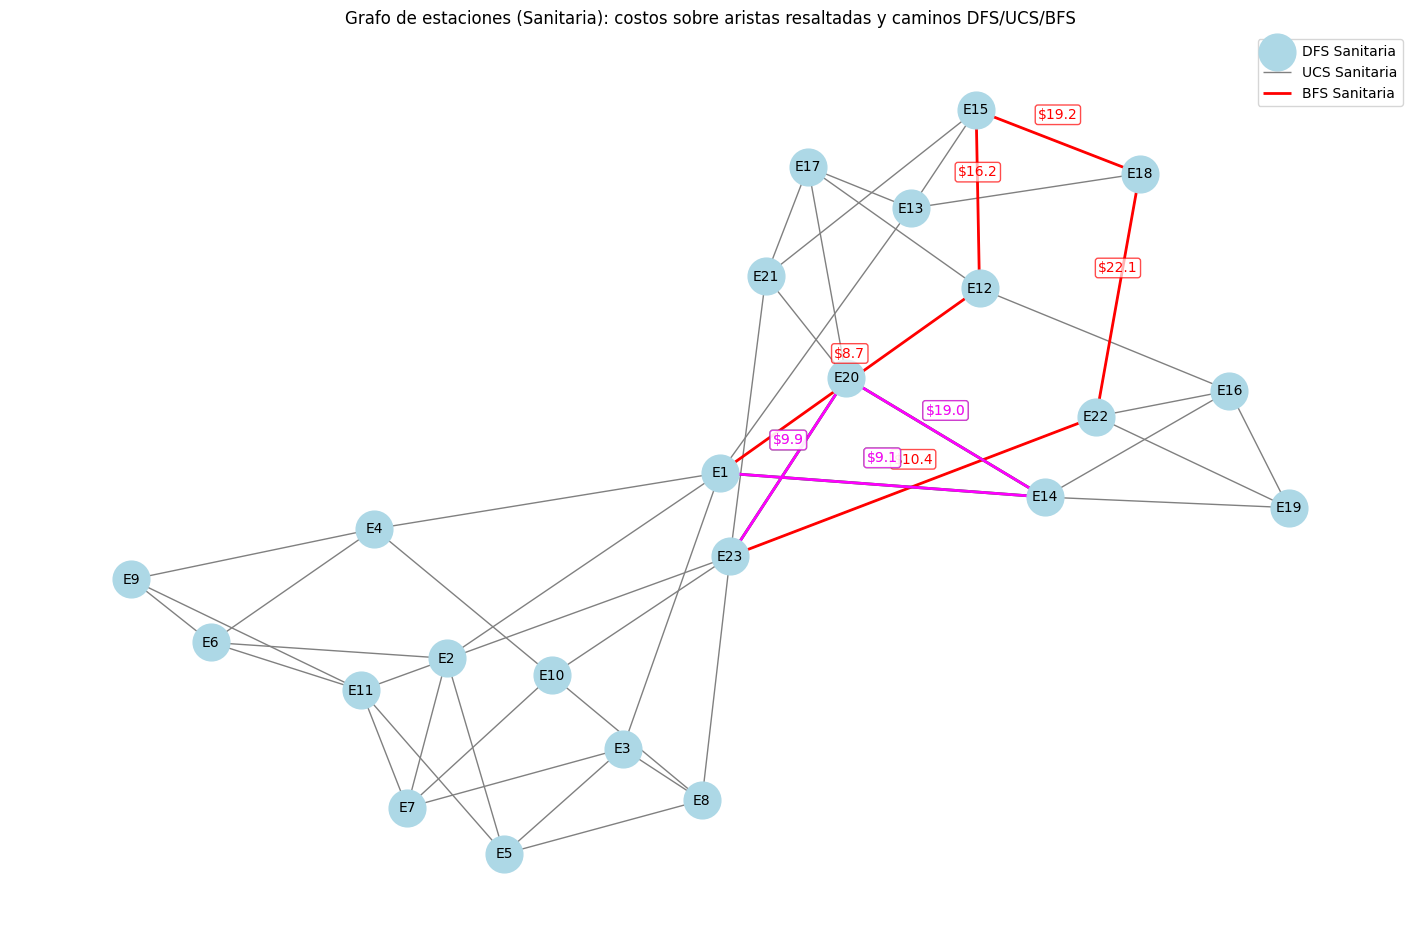

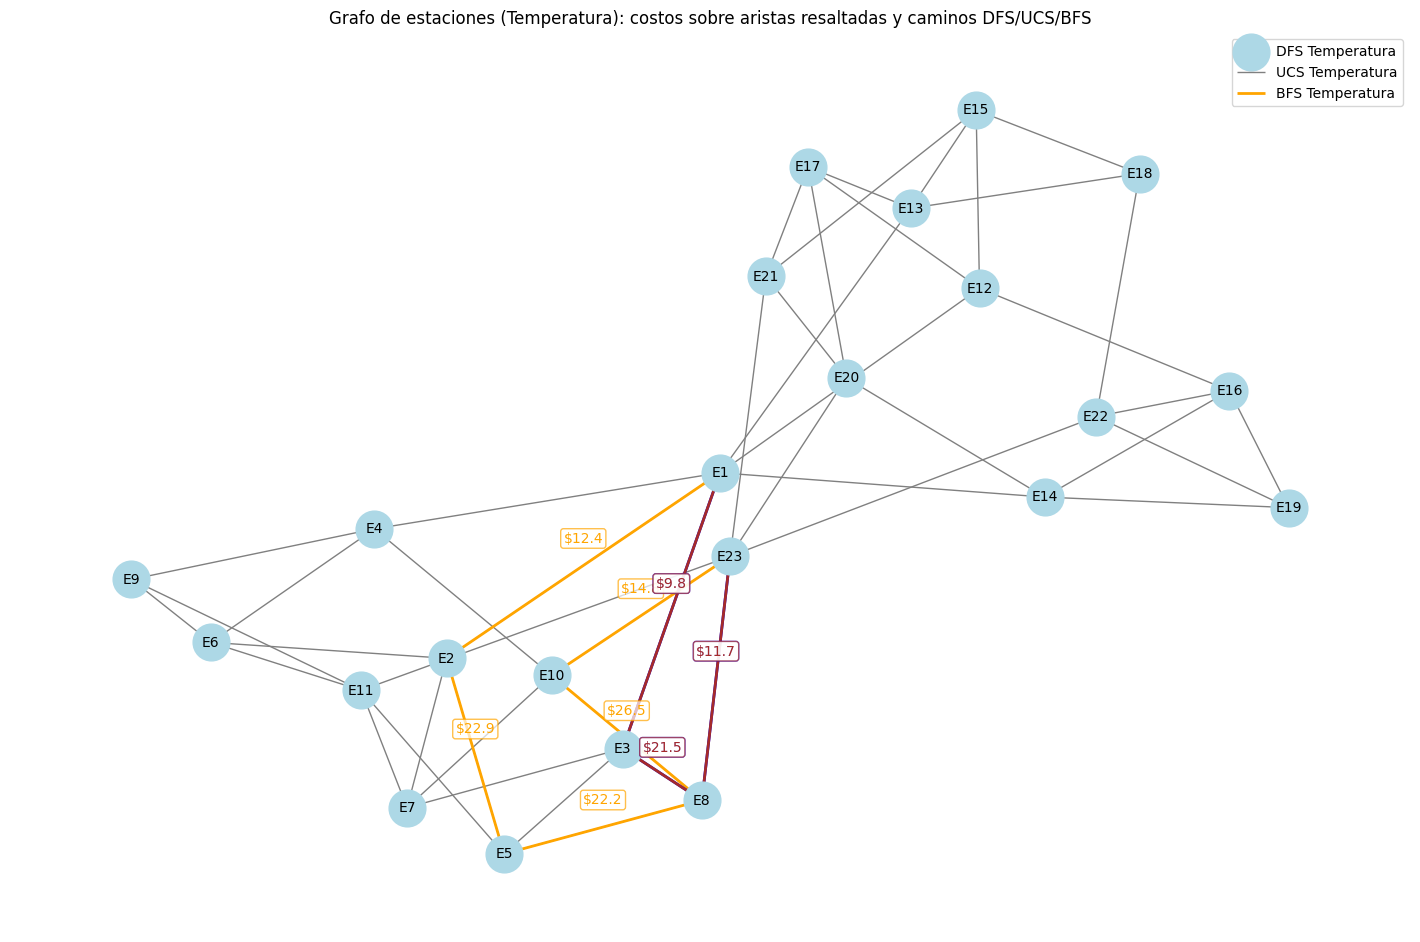

In [ ]:
G = nx.Graph()
G.add_edges_from(edges)

def get_node_costs(estaciones):
    return {str(est[0]): float(est[2]) for est in estaciones}
node_costs = get_node_costs(estaciones)

def get_edge_costs(G, node_costs):
    return {(a, b): node_costs[a] + node_costs[b] for a, b in G.edges}
edge_costs = get_edge_costs(G, node_costs)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(14,9))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10)

from matplotlib import collections

def draw_edge_labels_highlighted(G, pos, edge_list, edge_costs, color):
    for (a, b) in edge_list:
        x1, y1 = pos[a]
        x2, y2 = pos[b]
        xm, ym = (x1 + x2) / 2, (y1 + y2) / 2
        label = f"${edge_costs.get((a, b), edge_costs.get((b, a), 0)):.1f}"
        plt.text(xm, ym + 0.04, label, color=color, fontsize=10, ha='center', va='bottom', bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.2', lw=1, alpha=0.7))

# DFS Sanitaria
if dfs_path_sanitaria:
    path_edges = list(zip(dfs_path_sanitaria[0], dfs_path_sanitaria[0][1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2, label='DFS Sanitaria')
    draw_edge_labels_highlighted(G, pos, path_edges, edge_costs, 'red')
# UCS Sanitaria
if ucs_path_sanitaria:
    path_edges = list(zip(ucs_path_sanitaria[0], ucs_path_sanitaria[0][1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=2, label='UCS Sanitaria')
    draw_edge_labels_highlighted(G, pos, path_edges, edge_costs, 'green')
# BFS Sanitaria
if bfs_path_sanitaria:
    path_edges = list(zip(bfs_path_sanitaria[0], bfs_path_sanitaria[0][1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='magenta', width=2, label='BFS Sanitaria')
    draw_edge_labels_highlighted(G, pos, path_edges, edge_costs, 'magenta')

plt.legend(['DFS Sanitaria', 'UCS Sanitaria', 'BFS Sanitaria'])
plt.title('Grafo de estaciones (Sanitaria): costos sobre aristas resaltadas y caminos DFS/UCS/BFS')
plt.axis('off')
plt.show()

# Visualización temperatura: caminos DFS/UCS/BFS y costos en aristas resaltadas
plt.figure(figsize=(14,9))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=10)
# DFS Temperatura
if dfs_path_temperatura:
    path_edges = list(zip(dfs_path_temperatura[0], dfs_path_temperatura[0][1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='orange', width=2, label='DFS Temperatura')
    draw_edge_labels_highlighted(G, pos, path_edges, edge_costs, 'orange')
# UCS Temperatura
if ucs_path_temperatura:
    path_edges = list(zip(ucs_path_temperatura[0], ucs_path_temperatura[0][1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2, label='UCS Temperatura')
    draw_edge_labels_highlighted(G, pos, path_edges, edge_costs, 'blue')
# BFS Temperatura
if bfs_path_temperatura:
    path_edges = list(zip(bfs_path_temperatura[0], bfs_path_temperatura[0][1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='brown', width=2, label='BFS Temperatura')
    draw_edge_labels_highlighted(G, pos, path_edges, edge_costs, 'brown')

plt.legend(['DFS Temperatura', 'UCS Temperatura', 'BFS Temperatura'])
plt.title('Grafo de estaciones (Temperatura): costos sobre aristas resaltadas y caminos DFS/UCS/BFS')
plt.axis('off')
plt.show()

# 5. Experimentos Comparativos


# 6. Análisis de Resultados
